In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [28]:
df = pd.read_csv("Data1.csv")

In [29]:
df.head()

,x,y
0,0.1,8.298133
1,0.2,4.919282
2,0.3,4.145139
3,0.4,6.850788
4,0.5,6.375323


In [30]:
df.columns

Index(['x', 'y'], dtype='object')

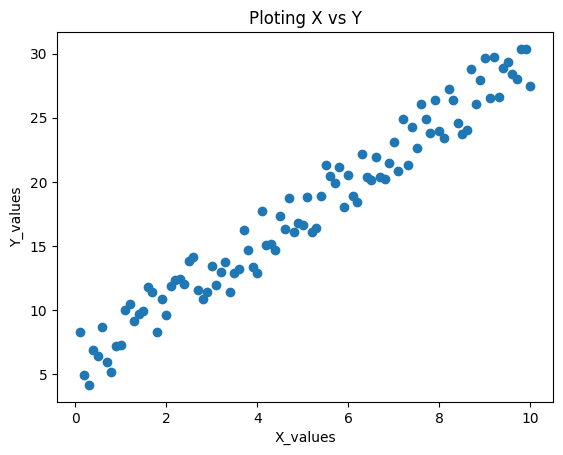

In [32]:
#scattering the data just to know about the data like how it looks and it tell a lot about the data
plt.scatter(df['x'],df['y'])
plt.title("Ploting X vs Y")
plt.ylabel("Y_values")
plt.xlabel("X_values")
plt.show()

In [33]:
# inserting a new feature x_0
df.insert(0, "x_0", 1)

In [34]:
df.head()

,x_0,x,y
0,1,0.1,8.298133
1,1,0.2,4.919282
2,1,0.3,4.145139
3,1,0.4,6.850788
4,1,0.5,6.375323


In [35]:
df.columns

Index(['x_0', 'x', 'y'], dtype='object')

In [37]:
#putting all the values of X and Y in the array
Y = np.array(df["y"])
X = np.array(df[["x_0","x"]]) #as there are two feature now so putting them in a 2d array

In [38]:
original_df = df.copy()  #copying my dataframe so that in future if i made some changes them i will again get the original dataframe

In [39]:
def multyDimenssionLinearRegression(X, Y):
    sum_xiyi = np.zeros(X.shape[1])
    # Calculate the sum of dot products of xi and yi
    for i in range(len(Y)):
        sum_xiyi += Y[i] * X[i]
    # Calculate the sum of dot products of xi
    sum_xixit = 0
    for i in range(len(Y)):
        xi = X[i].reshape((1, -1))
        transposed_xi = xi.T
        sum_xixit += np.dot(transposed_xi, xi)

    print("Sum of dot products of xi and yi:")
    print(sum_xiyi)

    print("Sum of dot products of xi and xi transpose:")
    print(sum_xixit)

    # Assuming A is the sum of dot products of xi
    A = sum_xixit
    print("Shape of A:", A.shape)

    # Calculate the inverse of A
    inverse_A = np.linalg.inv(A)
    print("Inverse of A:")
    print(inverse_A)

    w = np.dot(inverse_A, sum_xiyi)
    return w

In [40]:
w = multyDimenssionLinearRegression(X, Y)
print("\n")
print("The Coefficiants corresponding to x_i : ", w)

Sum of dot products of xi and yi:
[ 1772.02904603 10935.26473252]
Sum of dot products of xi and xi transpose:
[[ 100.   505. ]
 [ 505.  3383.5]]
Shape of A: (2, 2)
Inverse of A:
[[ 0.04060606 -0.00606061]
 [-0.00606061  0.00120012]]


The Coefficiants corresponding to x_i :  [5.68078713 2.38406007]


In [41]:
predicted_values = np.dot(X, w)
df['y_hat'] = predicted_values

In [42]:
df['y_hat']

0      5.919193
1      6.157599
2      6.396005
3      6.634411
4      6.872817
        ...    
95    28.567764
96    28.806170
97    29.044576
98    29.282982
99    29.521388
Name: y_hat, Length: 100, dtype: float64

In [43]:
predicted_values

array([ 5.91919313,  6.15759914,  6.39600515,  6.63441115,  6.87281716,
        7.11122317,  7.34962917,  7.58803518,  7.82644119,  8.06484719,
        8.3032532 ,  8.54165921,  8.78006521,  9.01847122,  9.25687723,
        9.49528323,  9.73368924,  9.97209525, 10.21050125, 10.44890726,
       10.68731327, 10.92571927, 11.16412528, 11.40253129, 11.64093729,
       11.8793433 , 12.11774931, 12.35615531, 12.59456132, 12.83296732,
       13.07137333, 13.30977934, 13.54818534, 13.78659135, 14.02499736,
       14.26340336, 14.50180937, 14.74021538, 14.97862138, 15.21702739,
       15.4554334 , 15.6938394 , 15.93224541, 16.17065142, 16.40905742,
       16.64746343, 16.88586944, 17.12427544, 17.36268145, 17.60108746,
       17.83949346, 18.07789947, 18.31630548, 18.55471148, 18.79311749,
       19.0315235 , 19.2699295 , 19.50833551, 19.74674152, 19.98514752,
       20.22355353, 20.46195954, 20.70036554, 20.93877155, 21.17717756,
       21.41558356, 21.65398957, 21.89239558, 22.13080158, 22.36

In [45]:
df['y']

0      8.298133
1      4.919282
2      4.145139
3      6.850788
4      6.375323
        ...    
95    28.420698
96    27.984652
97    30.336851
98    30.376285
99    27.453770
Name: y, Length: 100, dtype: float64

In [ ]:
xlist = np.array(df['x'])
ylist = np.array(df['y_hat'])

data = {'xlist': xlist, 'y_list': ylist}
new_df = pd.DataFrame(data)

sns.pairplot(df, x_vars='x' ,y_vars='y', height=4, aspect=1, kind='scatter')

plt.show()

In [49]:
df['y']

0      8.298133
1      4.919282
2      4.145139
3      6.850788
4      6.375323
        ...    
95    28.420698
96    27.984652
97    30.336851
98    30.376285
99    27.453770
Name: y, Length: 100, dtype: float64

In [51]:
actual_values = np.array(df["y"])

In [52]:
actual_values

array([ 8.29813332,  4.91928203,  4.14513926,  6.85078751,  6.37532285,
        8.66900032,  5.892481  ,  5.14096136,  7.18210595,  7.21321204,
        9.9733546 , 10.44698278,  9.16184109,  9.64113111,  9.93119128,
       11.75007591, 11.38056547,  8.29921992, 10.80440773,  9.57955299,
       11.83050005, 12.31880885, 12.41958453, 12.02188696, 13.79658869,
       14.13202057, 11.51771538, 10.86080531, 11.39279333, 13.38472171,
       11.95745209, 12.91386373, 13.71959038, 11.35151216, 12.84962543,
       13.21787514, 16.22009084, 14.68530289, 13.36892181, 12.83373282,
       17.71943626, 15.09282035, 15.16144608, 14.69057783, 17.32059389,
       16.31741678, 18.72100609, 16.06993011, 16.79940577, 16.63185275,
       18.84230139, 16.04231112, 16.39271984, 18.89625858, 21.27580434,
       20.41205444, 19.9056606 , 21.12027015, 18.00697035, 20.50041216,
       18.87756965, 18.38337322, 22.16151723, 20.4027298 , 20.1408769 ,
       21.91378004, 20.3988648 , 20.19237696, 21.48313727, 23.10

In [53]:
#Actual value and the predicted value
reg_model = pd.DataFrame({'Actual value': actual_values, 'Predicted value': predicted_values})

In [54]:
absolute_errors = np.abs(actual_values -predicted_values )
mae = np.mean(absolute_errors)
print("MAE :" , mae)

squared_errors = (actual_values - predicted_values )**2
mse = np.mean(squared_errors)
print("MSE :" ,mse)

rmse = np.sqrt(mse)
print("RMSE :" ,rmse)

mean_actual= np.mean(actual_values)
rss = np.sum((actual_values -predicted_values)**2)
tss = np.sum((actual_values - mean_actual)**2)
r_squared = 1 - (rss / tss)
print("R^2 : ", r_squared)

MAE : 1.280555978429146
MSE : 2.0785254017773265
RMSE : 1.4417091945941547
R^2 :  0.9579571905586358


In [55]:
reg_model

,Actual value,Predicted value
0,8.298133,5.919193
1,4.919282,6.157599
2,4.145139,6.396005
3,6.850788,6.634411
4,6.375323,6.872817
...,...,...
95,28.420698,28.567764
96,27.984652,28.806170
97,30.336851,29.044576
98,30.376285,29.282982


In [56]:
def Coeff_deter(y_true, y_pred):
    #Calculate the mean of the observed values
    mean_y_true = np.mean(y_true)

    #sum of squared residual
    RSS = np.sum((y_true - y_pred)**2)

    #total sum of sqares
    TSS = np.sum((y_true - mean_y_true)**2)

    #R^2
    r_squared = 1 - (RSS / TSS)

    return r_squared

# Calculate R^2
RSq = Coeff_deter(actual_values, predicted_values)

print(f'coefficient of determination(R^2) is: {RSq}')

coefficient of determination(R^2) is: 0.9579571905586358


In [58]:
#Assuming xlist and ylist are your arrays of x and y values
xlist = np.array(df['x'])
ylist = np.array(df['y_hat'])

#Create a DataFrame from arrays
data = {'xlist': xlist, 'ylist': ylist}
new_df = pd.DataFrame(data)

# Scatter plot
fig = px.scatter(df, x='x', y='y', labels={'x': 'X Values', 'y': 'Y Values'})

# Line plot
fig.add_trace(go.Scatter(x=new_df['xlist'], y=new_df['ylist'], mode='lines', name='Fit'))

# Show the plot
fig.show()